In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [2]:
customer = pd.read_csv("Mall_Customers.csv")

# Pre-processing and EDA

In [3]:
customer.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


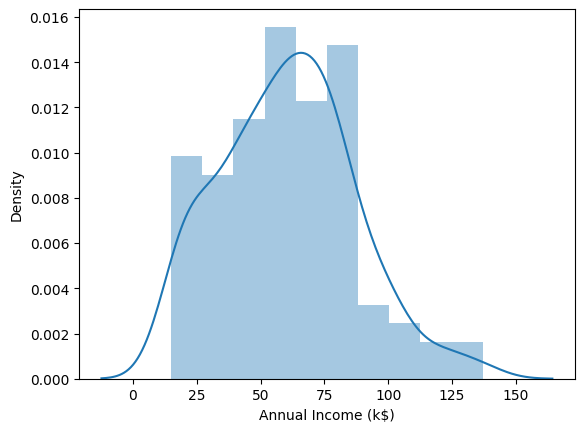

In [4]:
sns.distplot(customer['Annual Income (k$)']);

In [5]:
customer.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

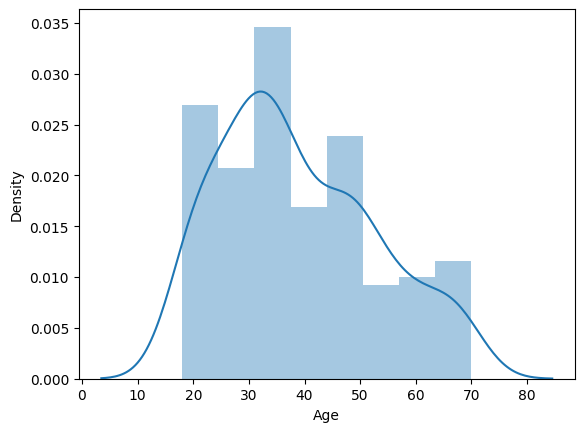

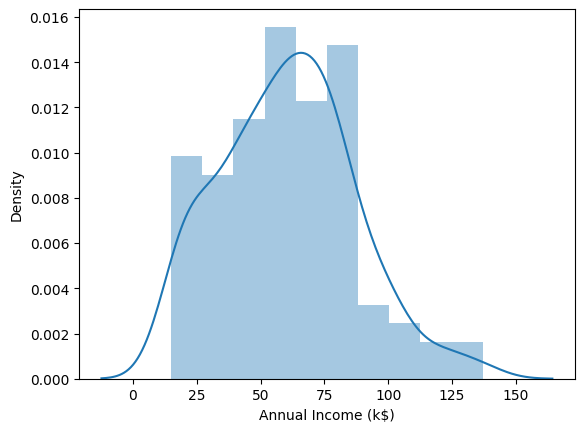

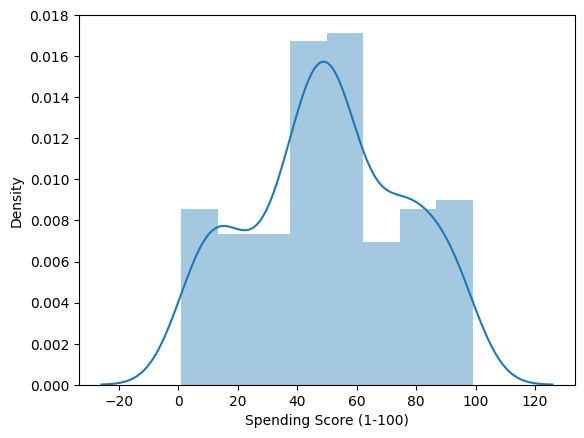

In [6]:
columns = ['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.distplot(customer[i])

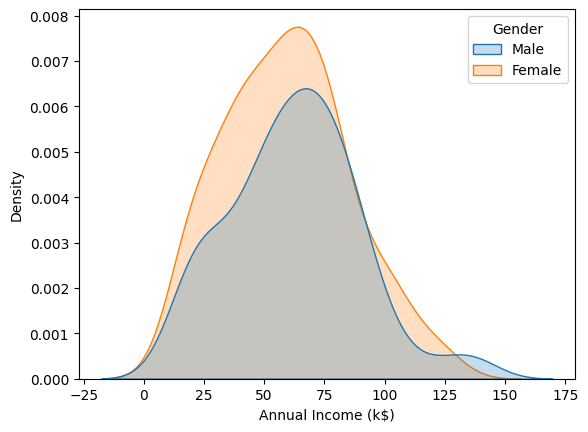

In [7]:
sns.kdeplot(x= customer['Annual Income (k$)'],shade=True,hue=customer['Gender']);

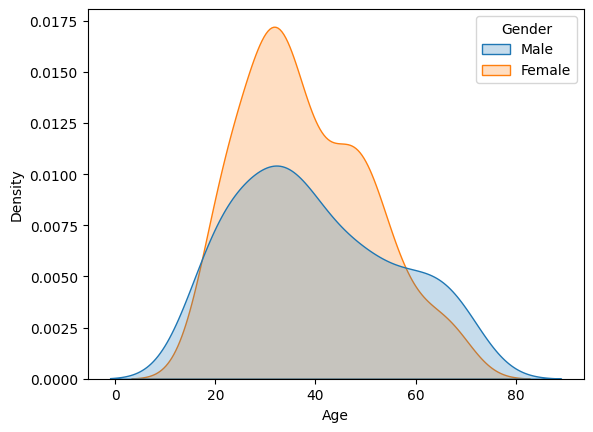

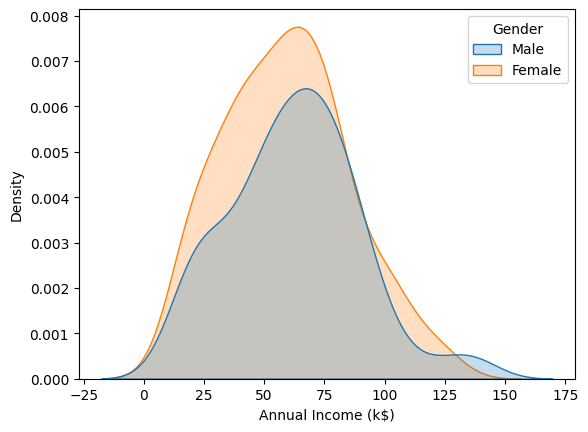

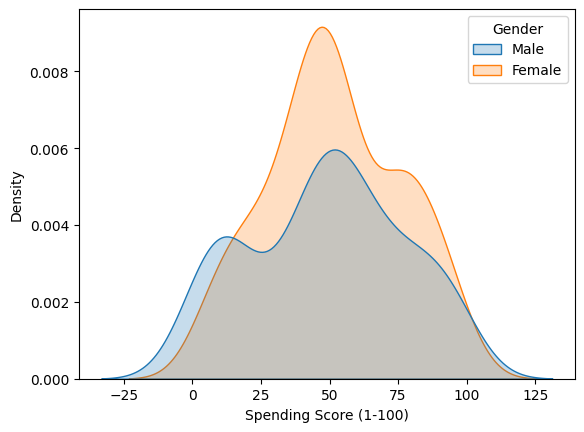

In [8]:
columns = ['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.kdeplot(x= customer[i],shade=True,hue=customer['Gender'])

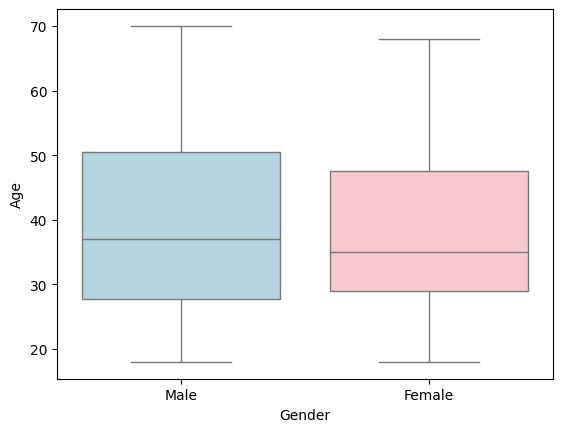

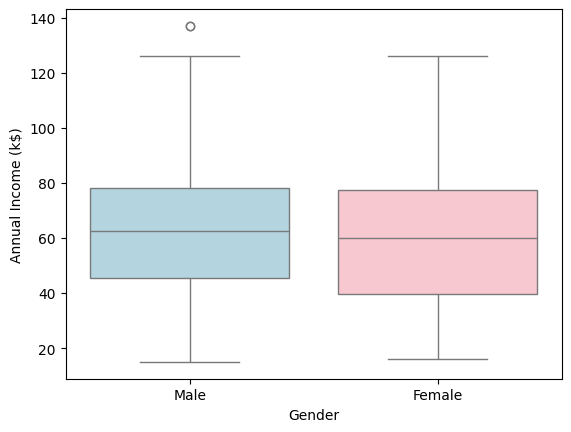

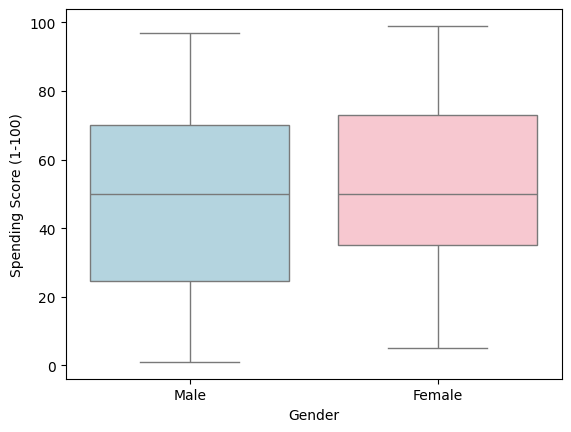

In [9]:
columns = ['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.boxplot(data=customer,x='Gender',y=customer[i], palette= ['lightblue', 'pink'])

In [10]:
customer['Gender'].value_counts(normalize=True)

Gender
Female    0.56
Male      0.44
Name: proportion, dtype: float64

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

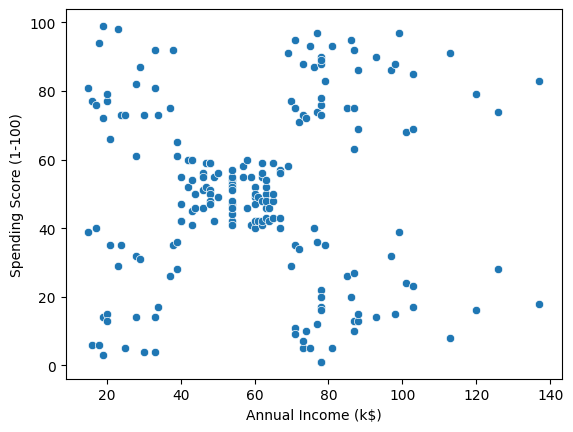

In [11]:
sns.scatterplot(data=customer, x='Annual Income (k$)',y='Spending Score (1-100)' )

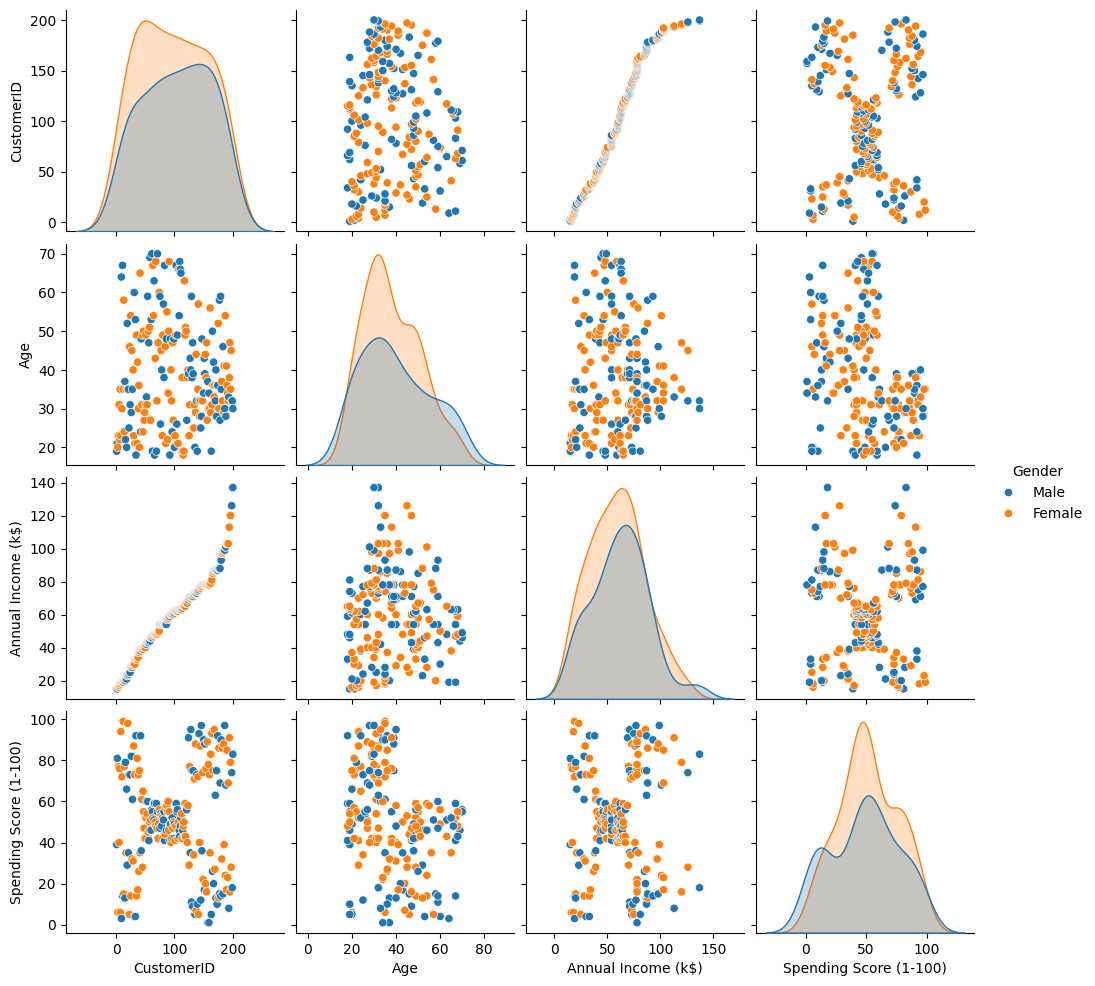

In [12]:

sns.pairplot(customer,hue='Gender')

In [13]:
customer.groupby(['Gender'])[['Age', 'Annual Income (k$)',
       'Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


In [14]:
# Select only numeric columns
numeric = customer.select_dtypes(include=[np.number])

corr_matrix= numeric.corr()

<Axes: >

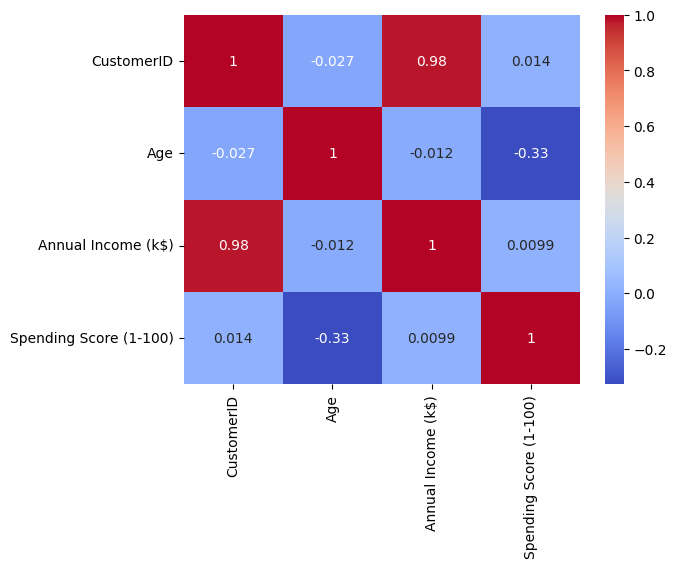

In [15]:
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm')

# K-means Clustering 


In [16]:
# univariate
clustering1 = KMeans(n_clusters=3)

In [17]:
clustering1.fit(customer[['Annual Income (k$)']])

KMeans(n_clusters=3)

In [18]:
clustering1.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [19]:
customer['Income Cluster'] = clustering1.labels_
customer.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster
0,1,Male,19,15,39,1
1,2,Male,21,15,81,1
2,3,Female,20,16,6,1
3,4,Female,23,16,77,1
4,5,Female,31,17,40,1


In [20]:
customer['Income Cluster'].value_counts()

Income Cluster
2    90
1    74
0    36
Name: count, dtype: int64

In [21]:
clustering1.inertia_

23517.33093093093

In [22]:
intertia_scores=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(customer[['Annual Income (k$)']])
    intertia_scores.append(kmeans.inertia_)
intertia_scores

[137277.28,
 48660.88888888889,
 25341.285871863227,
 13278.112713472485,
 8481.49619047619,
 5103.823725981621,
 4288.447237076649,
 2936.7888888888892,
 2584.3170995671,
 2018.833729016082]

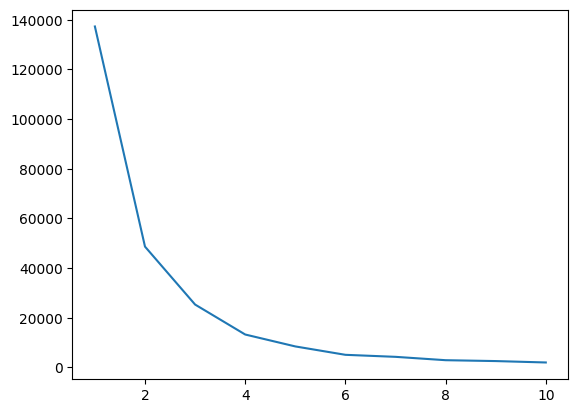

In [23]:
plt.plot(range(1,11),intertia_scores)

In [24]:
customer.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)', 'Income Cluster'],
      dtype='object')

In [25]:
customer.groupby('Income Cluster')[['Age', 'Annual Income (k$)',
       'Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Income Cluster,,,
0,37.833333,99.888889,50.638889
1,39.500000,33.486486,50.229730
2,38.722222,67.088889,50.000000


In [26]:
#Bivariate Clustering

In [27]:
clustering2 = KMeans(n_clusters=5)
clustering2.fit(customer[['Annual Income (k$)','Spending Score (1-100)']])
customer['Spending and Income Cluster'] =clustering2.labels_
customer.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,1,Male,19,15,39,1,4
1,2,Male,21,15,81,1,2
2,3,Female,20,16,6,1,4
3,4,Female,23,16,77,1,2
4,5,Female,31,17,40,1,4


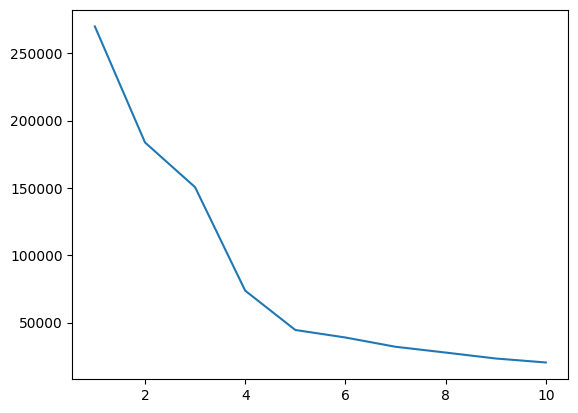

In [28]:
intertia_scores2=[]
for i in range(1,11):
    kmeans2=KMeans(n_clusters=i)
    kmeans2.fit(customer[['Annual Income (k$)','Spending Score (1-100)']])
    intertia_scores2.append(kmeans2.inertia_)
plt.plot(range(1,11),intertia_scores2)

In [29]:
centers =pd.DataFrame(clustering2.cluster_centers_)
centers.columns = ['x','y']

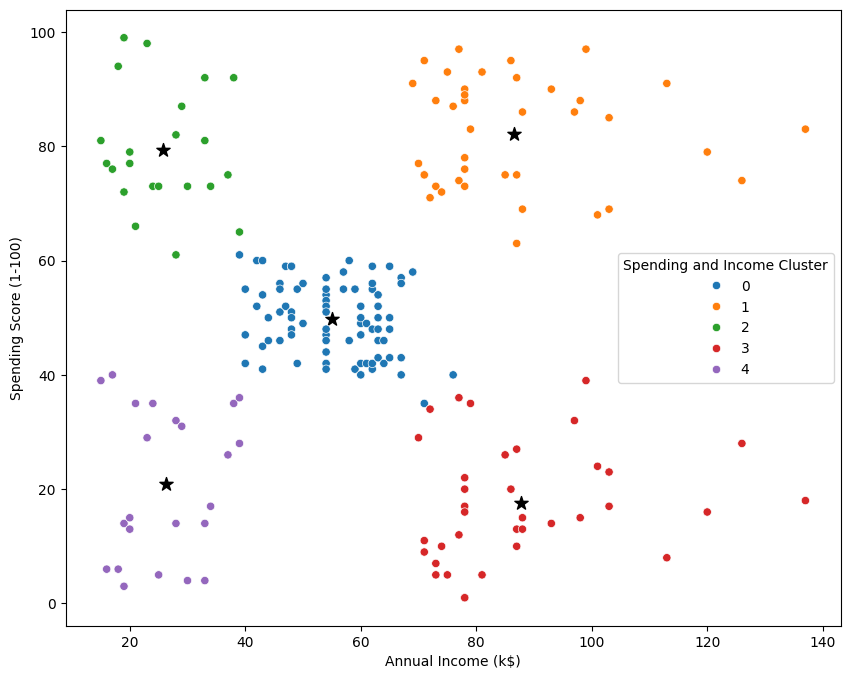

In [30]:
plt.figure(figsize=(10,8))
plt.scatter(x=centers['x'],y=centers['y'],s=100,c='black',marker='*')
sns.scatterplot(data=customer, x ='Annual Income (k$)',y='Spending Score (1-100)',hue='Spending and Income Cluster',palette='tab10')
plt.savefig('clustering_bivaraiate.png')

In [31]:
pd.crosstab(customer['Spending and Income Cluster'],customer['Gender'],normalize='index')

Gender,Female,Male
Spending and Income Cluster,,
0,0.587500,0.412500
1,0.538462,0.461538
2,0.590909,0.409091
3,0.472222,0.527778
4,0.608696,0.391304


In [32]:
customer.groupby('Spending and Income Cluster')[['Age', 'Annual Income (k$)',
       'Spending Score (1-100)']].mean()


,Age,Annual Income (k$),Spending Score (1-100)
Spending and Income Cluster,,,
0,42.937500,55.087500,49.712500
1,32.692308,86.538462,82.128205
2,25.272727,25.727273,79.363636
3,40.666667,87.750000,17.583333
4,45.217391,26.304348,20.913043


In [33]:
#mulivariate clustering 
from sklearn.preprocessing import StandardScaler

In [34]:
scale = StandardScaler()
customer.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,1,Male,19,15,39,1,4
1,2,Male,21,15,81,1,2
2,3,Female,20,16,6,1,4
3,4,Female,23,16,77,1,2
4,5,Female,31,17,40,1,4


In [35]:
df= pd.get_dummies(customer,drop_first=True)
df.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster,Gender_Male
0,1,19,15,39,1,4,True
1,2,21,15,81,1,2,True
2,3,20,16,6,1,4,False
3,4,23,16,77,1,2,False
4,5,31,17,40,1,4,False


In [36]:
df.columns

Index(['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'Income Cluster', 'Spending and Income Cluster', 'Gender_Male'],
      dtype='object')

In [37]:
df= df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)','Gender_Male']]
df.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15,39,True
1,21,15,81,True
2,20,16,6,False
3,23,16,77,False
4,31,17,40,False


In [38]:
df= scale.fit_transform(numeric)
df= pd.DataFrame(scale.fit_transform(numeric))
df.head()

,0,1,2,3
0,-1.723412,-1.424569,-1.738999,-0.434801
1,-1.706091,-1.281035,-1.738999,1.195704
2,-1.688771,-1.352802,-1.700830,-1.715913
3,-1.671450,-1.137502,-1.700830,1.040418
4,-1.654129,-0.563369,-1.662660,-0.395980


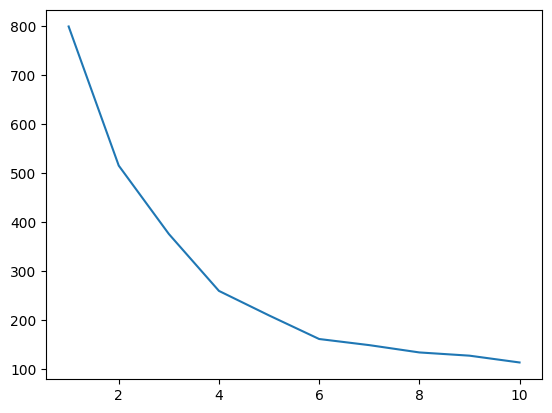

In [39]:
intertia_scores3=[]
for i in range(1,11):
    kmeans3=KMeans(n_clusters=i)
    kmeans3.fit(df)
    intertia_scores3.append(kmeans3.inertia_)
plt.plot(range(1,11),intertia_scores3)

In [40]:
customer

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,1,Male,19,15,39,1,4
1,2,Male,21,15,81,1,2
2,3,Female,20,16,6,1,4
3,4,Female,23,16,77,1,2
4,5,Female,31,17,40,1,4
...,...,...,...,...,...,...,...
195,196,Female,35,120,79,0,1
196,197,Female,45,126,28,0,3
197,198,Male,32,126,74,0,1
198,199,Male,32,137,18,0,3


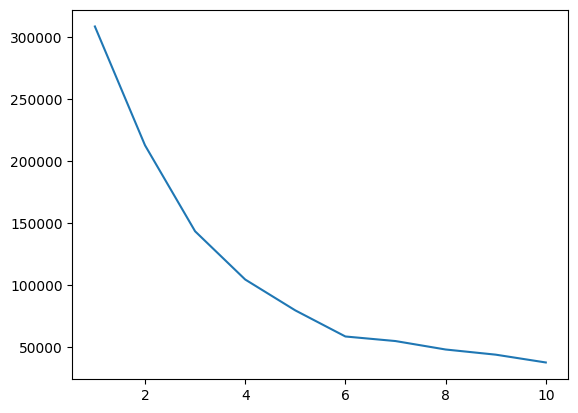

In [41]:
# 3-D plot 
intertia_scores4=[]
for i in range(1,11):
    kmeans4=KMeans(n_clusters=i)
    kmeans4.fit(customer[['Annual Income (k$)','Spending Score (1-100)','Age']])
    intertia_scores4.append(kmeans4.inertia_)
plt.plot(range(1,11),intertia_scores4)

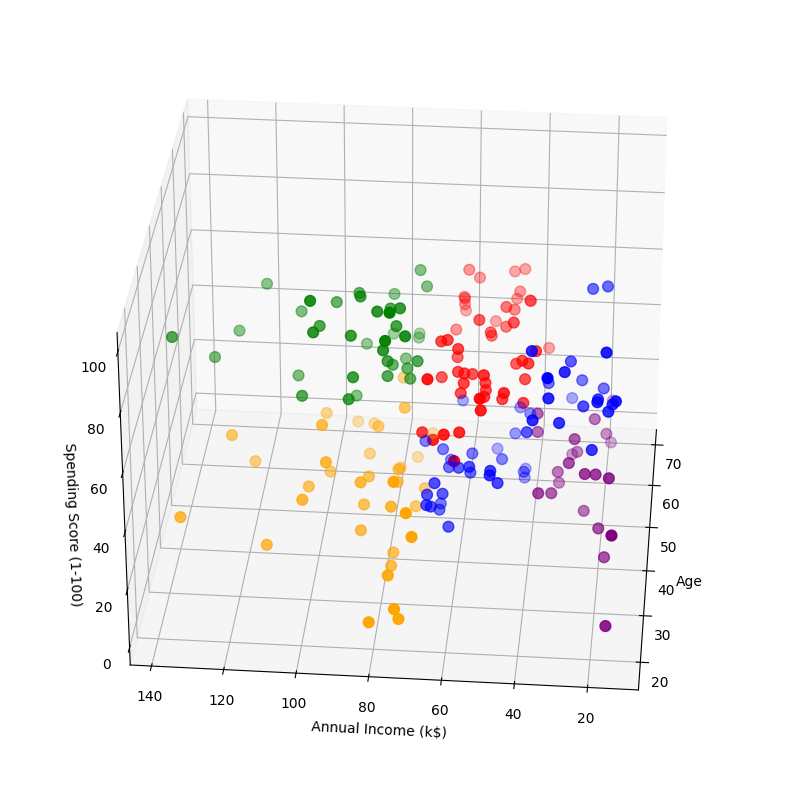

In [43]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
km = KMeans(n_clusters=5)
clusters = km.fit_predict(numeric.iloc[:,1:])

customer["label"] = clusters

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(customer.Age[customer.label == 0], customer["Annual Income (k$)"][customer.label == 0], customer["Spending Score (1-100)"][customer.label == 0], c='blue', s=60)
ax.scatter(customer.Age[customer.label == 1], customer["Annual Income (k$)"][customer.label == 1], customer["Spending Score (1-100)"][customer.label == 1], c='red', s=60)
ax.scatter(customer.Age[customer.label == 2], customer["Annual Income (k$)"][customer.label == 2], customer["Spending Score (1-100)"][customer.label == 2], c='green', s=60)
ax.scatter(customer.Age[customer.label == 3], customer["Annual Income (k$)"][customer.label == 3], customer["Spending Score (1-100)"][customer.label == 3], c='orange', s=60)
ax.scatter(customer.Age[customer.label == 4], customer["Annual Income (k$)"][customer.label == 4], customer["Spending Score (1-100)"][customer.label == 4], c='purple', s=60)
ax.view_init(30, 185)
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
plt.show()